<a href="https://colab.research.google.com/github/lisatwyw/data-gym/blob/master/dimRedux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview # 

- This is a demo code to run TSNE and UMap (for data-dimensionality reduction).

- Post-demo exercise: UMap vs. TSNE comparsion on your own data


In [1]:
import numpy as np
from sklearn.manifold import TSNE

import random

X  = np.random.randint(0,2, (2000,45,16))
X.shape 

(2000, 45, 16)

In [2]:
try:
  import umap
except:
  ! pip install umap
  
try:
  import tsne
except:
  ! pip install tsne


  Created wheel for tsne: filename=tsne-0.1.8-cp36-cp36m-linux_x86_64.whl size=226382 sha256=ce09e713b756e6729632b0ea1ffb21bfde04da90db9da277f848d5f2dd8a24fc
  Stored in directory: /root/.cache/pip/wheels/69/b4/26/9a673d2333de6af3865b5a2b462b3b0cfe4556ae69979434dd
Successfully built tsne


In [3]:
X_reshaped = np.reshape(X, (X.shape[0], X.shape[1]*X.shape[2]))
X_reshaped.shape

(2000, 720)

In [4]:
import time

t2=time.perf_counter()
embeddings = dict()
embeddings['umap'] = umap.UMAP().fit_transform( X_reshaped )    
t1=time.perf_counter()

embeddings['umap'].shape

print( 'Took', ( t1 - t2 ), 'seconds for UMap to complete')

Took 9.11080412199999 seconds for UMap to complete


In [5]:
t4=time.perf_counter()
embeddings['tsne'] = TSNE(n_components=2).fit_transform(X_reshaped )
t3=time.perf_counter()
print( 'Took', ( t3 - t4 ), 'seconds for TSNE to complete')

Took 22.339009066000017 seconds for TSNE to complete


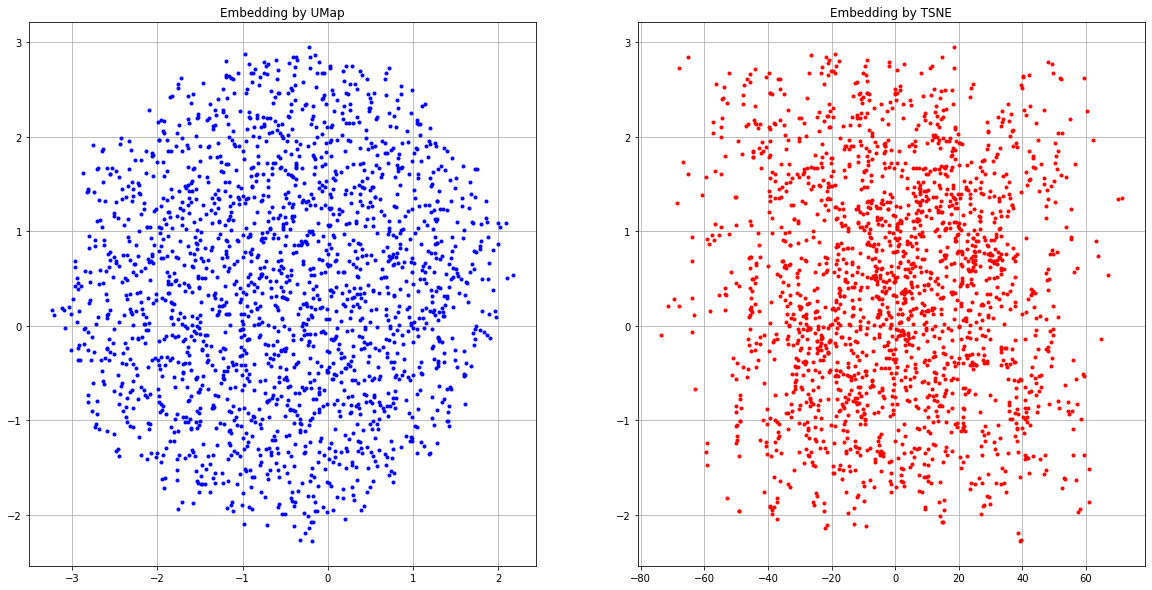

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 20,10 ))  
axes=fig.subplots(1,2)   

t1=time.perf_counter()
 
axes[0].plot(embeddings['umap'][:,0], embeddings['umap'][:,1], 'b.', label='UMAP')
axes[0].set_title('Embedding by UMap')
axes[0].grid()
axes[1].plot(embeddings['tsne'][:,0], embeddings['umap'][:,1], 'r.', label='TSNE')
axes[1].set_title('Embedding by TSNE')
axes[1].grid()


In [0]:
if 0:
  clrs=['r','g','b','m', 'c', 'k' ]

  for i, c in enumerate( ['1','2','3', '4', ] ):  
      q = np.where( v_label_annotations == c )[0]    
      plt.plot( v_embedded[q,0], v_embedded[q,1], color=clrs[i], label=c )
    
  plt.legend()    
  plt.savefig( 'tsne-embedding.png' )


In [8]:
! pip freeze

absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.0.1
asgiref==3.2.5
astor==0.8.1
astropy==4.0
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.3
blis==0.4.1
bokeh==1.4.0
boto3==1.12.26
botocore==1.15.26
Bottleneck==1.3.2
branca==0.4.0
bs4==0.0.1
bz2file==0.98
CacheControl==0.12.6
cachetools==3.1.1
catalogue==1.0.0
certifi==2019.11.28
cffi==1.14.0
chainer==6.5.0
chardet==3.0.4
click==7.1.1
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.4
cvxpy==1.0.28
cycler==0.10.0
cymem==2.0.3
Cython==0.29.15
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0.4
dlib==19.18.0
dm-sonnet